In [1]:
#%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

### Parameters

In [2]:
# Number of data samples
n = 1

# Dimensions per sample
d = 1

In [3]:
# random seed for reproducibility
np.random.seed(0)

# original data vectors
x, y, z = np.random.randn(3, d)

# u, v, vectors for convenience
u = x - y
v = x - z

# weight vector initialization
w = np.random.randn(d)

In [4]:
def func(w, u, v, alpha):
    return max(0, (w@u)**2 - (w@v)**2 + alpha)

def smooth_func(w, u, v, alpha, mu):
    return mu * np.log(
        np.exp((1/mu)*((w@u)**2 + alpha)) +
        np.exp((1/mu)*((w@v)**2))
    ) - (w@v)**2

In [5]:
alpha = 0
mu = 1

r = func(w, u, v, alpha)
rs = smooth_func(w, u, v, alpha, mu)

print(r, rs)

6.244318806802592 6.246258377250991


u, v: [1.36389514] [0.78531436]
u, v: [0.37333521] [3.21817108]
u, v: [1.10144563] [1.05330727]
u, v: [0.26655493] [-1.04367501]
u, v: [0.63936271] [0.31717449]
u, v: [-1.16040475] [0.53883259]


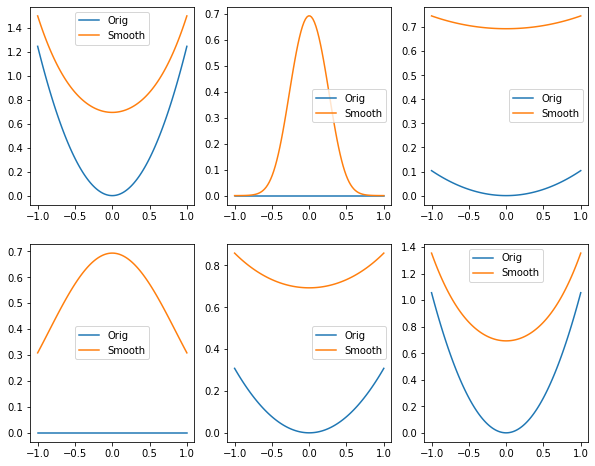

In [6]:
np.random.seed(0)
Tr = 2
Tc = 3

alpha = 0
mu = 1
lim = 1


s = 100

fig, ax_arr = plt.subplots(nrows=Tr, ncols=Tc, figsize=(10, 8))

# Try z, 2z
for tr in range(Tr):
    for tc in range(Tc):
        # Initialize data
        x, y, z = np.random.randn(3, d)

        # u, v, vectors for convenience
        u = x - y
        v = x - z
        print('u, v:', u, v)

        r_list = []
        rs_list = []
        w_list = []
        for w in np.linspace(np.array([-1*lim]), np.array([1*lim]), s):
            w_list.append(w)
            r = func(w, u, v, alpha)
            rs = smooth_func(w, u, v, alpha, mu)
            r_list.append(r)
            rs_list.append(rs)

        ax_arr[tr, tc].plot(w_list, r_list, label='Orig')
        ax_arr[tr, tc].plot(w_list, rs_list, label='Smooth')
        ax_arr[tr, tc].legend()

plt.show()

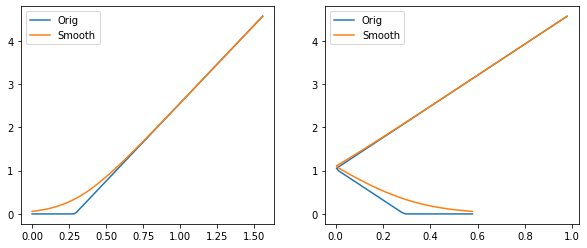

In [7]:
np.random.seed(0)

alpha = 0
mu = 0.5

w = np.random.randn(d)
y, z = np.random.randn(2, d)
s = 100

un_list, vn_list = [], []
r_list = []
rs_list = []
# Try z, 2z
for x in np.linspace(y, 2*z, s):
    # u, v, vectors for convenience
    u = x - y
    v = x - z
    
    r = func(w, u, v, alpha)
    rs = smooth_func(w, u, v, alpha, mu)
    un_list.append(np.linalg.norm(u))
    vn_list.append(np.linalg.norm(v))
    r_list.append(r)
    rs_list.append(rs)
    
fig, (u_ax, v_ax) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

u_ax.plot(un_list, r_list, label='Orig')
u_ax.plot(un_list, rs_list, label='Smooth')
u_ax.legend()

v_ax.plot(vn_list, r_list, label='Orig')
v_ax.plot(vn_list, rs_list, label='Smooth')
v_ax.legend()

plt.show()

### Loss Surface for n=1

(100, 100) (100, 100) (100, 100)
(100, 100) (100, 100) (100, 100)


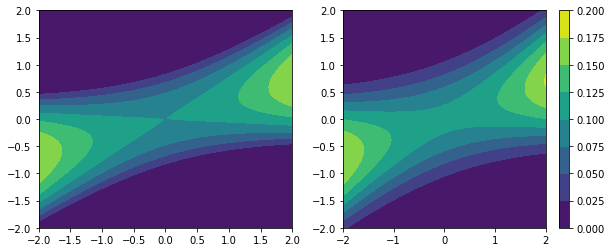

In [8]:
# Dimensions per sample
d = 2

np.random.seed(0)

alpha = 0.1
mu = 0.05

w = np.random.rand(d)
x, y, z = np.random.rand(3, d, 1)
s = 100

u = x - y
v = x - z

_w1 = np.linspace(-2, 2, s)
_w2 = np.linspace(-2, 2, s)

w1, w2 = np.meshgrid(_w1, _w2)

#print(w1.shape, w2.shape)

w = np.stack([w1, w2]).reshape(2, s*s).T

def func_md(w, u, v, alpha):
    return np.maximum(0, (w@u)**2 - (w@v)**2 + alpha)

def smooth_func_md(w, u, v, alpha, mu):
    return mu * np.log(
        np.exp((1/mu)*((w@u)**2  + alpha)) +
        np.exp((1/mu)*((w@v)**2))
    ) - ((w@v)**2)

r = func_md(w, u, v, alpha).reshape(s, s)
print(w1.shape, w2.shape, r.shape)

rs = smooth_func_md(w, u, v, alpha, mu).reshape(s, s)
print(w1.shape, w2.shape, rs.shape)


fig, (orig_ax, smooth_ax) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

h = orig_ax.contourf(w1, w2, r)
hs = smooth_ax.contourf(w1, w2, rs)

fig.colorbar(h)
plt.show()

#print(w1.shape, w2.shape)

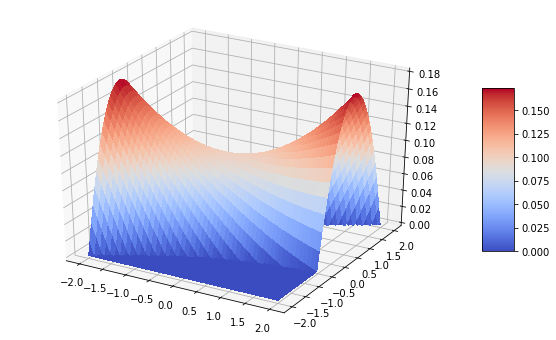

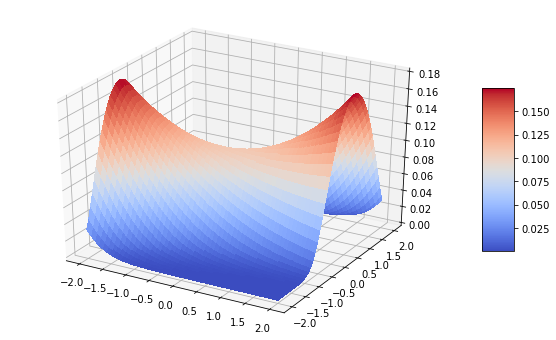

In [9]:
orig_fig_3d = plt.figure(figsize=(10, 6))
orig_ax_3d = orig_fig_3d.gca(projection='3d')

# Plot the surface.
orig_surf = orig_ax_3d.plot_surface(w1, w2, r, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#orig_ax_3d.set_zlim(-1.01, 1.01)
orig_ax_3d.zaxis.set_major_locator(LinearLocator(10))
orig_ax_3d.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
orig_fig_3d.colorbar(orig_surf, shrink=0.5, aspect=5)

####

smooth_fig_3d = plt.figure(figsize=(10, 6))
smooth_ax_3d = smooth_fig_3d.gca(projection='3d')

# Plot the surface.
smooth_surf = smooth_ax_3d.plot_surface(w1, w2, rs, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#smooth_ax_3d.set_zlim(-1.01, 1.01)
smooth_ax_3d.zaxis.set_major_locator(LinearLocator(10))
smooth_ax_3d.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
smooth_fig_3d.colorbar(smooth_surf, shrink=0.5, aspect=5)

plt.show()

### Loss Surface for $n \geq 1$

(2, 1) (2, 1) (2, 1)
(100, 100) (100, 100) (100, 100)
(100, 100) (100, 100) (100, 100)
(100, 100) (100, 100) (100, 100)
(100, 100) (100, 100) (100, 100)
(100, 100) (100, 100) (100, 100)
(100, 100) (100, 100) (100, 100)


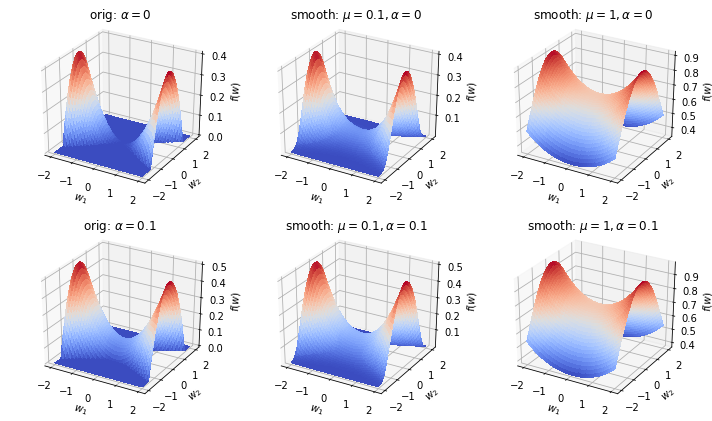

In [83]:
import itertools

np.random.seed(1)

# Number of data samples
# 5 rand, 12 randn
n = 1
#n=20
# Dimensions per sample
d = 2

#fig, ax = plt.subplots()
#ax.scatter(*zip(X), color='b')
#ax.scatter(*zip(Y), color='g')
#ax.scatter(*zip(Z), color='orange')
#plt.show()

if True:
    X, Y, Z = np.random.rand(3, d, n)
    print(X.shape, Y.shape, Z.shape)
else:
    _X, _Y = np.random.randn(2, n, d)
    _Y = _Y + 1
    # gen triplets
    cx = np.array(list(itertools.combinations(_X, 2)))
    cy = np.array(list(itertools.combinations(_Y, 2)))
    #print(_X.shape)
    #print(cx.shape, _Y.shape)
    t_list = []

    for x in cx:
        for y in _Y:
            t1 = np.concatenate([x, y.reshape(1, d)])
            t2 = np.concatenate([x[::-1, :], y.reshape(1, d)])
            t_list.append(t1)
            t_list.append(t2)

    for y in cy:
        for x in _X:
            t1 = np.concatenate([y, x.reshape(1, d)])
            t2 = np.concatenate([y[::-1, :], x.reshape(1, d)])
            t_list.append(t1)
            t_list.append(t2)

    t_arr = np.stack(t_list, axis=2)
    X, Y, Z = t_arr
    print(t_arr.shape)

    fig, ax = plt.subplots()
    ax.scatter(*_X.T, color='blue')
    ax.scatter(*_Y.T, color='orange')

    # Plot line w.T@x = 0

    plt.show()

s = 100
mu1 = 0.1
mu2 = 1.0

U = X - Y
V = X - Z

#V = np.array([[1, 1]]).T
#U = np.array([[2, 2]]).T

#_w1 = np.linspace(-0.5, 0.5, s)
#_w2 = np.linspace(-0.5, 0.5, s)
_w1 = np.linspace(-2, 2, s)
_w2 = np.linspace(-2, 2, s)


w1, w2 = np.meshgrid(_w1, _w2)

w = np.stack([w1, w2]).reshape(2, s*s).T

def func_md_nd(w, U, V, alpha):
    t = np.zeros(s*s)
    for u, v in zip(U.T, V.T):
         t += np.maximum(0, (w@u)**2 - (w@v)**2 + alpha)
    return (1 / n) * t

def smooth_func_md_nd(w, U, V, alpha, mu):
    t = np.zeros(s*s)
    for u, v in zip(U.T, V.T):
        t +=  mu * np.log(
            np.exp((1/mu)*((w@u)**2 + alpha)) +
            np.exp((1/mu)*((w@v)**2))
        ) - (w@v)**2
    return (1 / n) * t

fig = plt.figure(figsize=(10, 6))
alpha_list = [0, 0.1]
for alpha_idx, alpha in enumerate(alpha_list):
    r = func_md_nd(w, U, V, alpha).reshape(s, s)

    print(w1.shape, w2.shape, r.shape)

    rs = smooth_func_md_nd(w, U, V, alpha, mu1).reshape(s, s)
    print(w1.shape, w2.shape, rs.shape)

    rs2 = smooth_func_md_nd(w, U, V, alpha, mu2).reshape(s, s)
    print(w1.shape, w2.shape, rs2.shape)


    #fig, (orig_ax, smooth_ax, smooth_ax2) = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

    h = orig_ax.contourf(w1, w2, r)
    hs = smooth_ax.contourf(w1, w2, rs)
    hs2 = smooth_ax2.contourf(w1, w2, rs2)

    #fig.colorbar(h)
    #plt.show()

    #print(w1.shape, w2.shape)
    
    ax = fig.add_subplot(2, 3, alpha_idx*3 + 1, projection='3d')

    # Plot the surface.
    orig_surf = ax.plot_surface(w1, w2, r, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)
    ax.set_title(r'orig: $\alpha = {}$'.format(alpha))
    ax.set_xlabel(r'$w_1$')
    ax.set_ylabel(r'$w_2$')
    ax.set_zlabel(r'$f(w)$')
    ax.dist=11


    ax = fig.add_subplot(2, 3, alpha_idx*3 + 2, projection='3d')

    # Plot the surface.
    smooth_surf = ax.plot_surface(w1, w2, rs, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)
    ax.set_title(r'smooth: $\mu = 0.1, \alpha = {}$'.format(alpha))
    ax.set_xlabel(r'$w_1$')
    ax.set_ylabel(r'$w_2$')
    ax.set_zlabel(r'$f(w)$')
    ax.dist=11

    ax = fig.add_subplot(2, 3, alpha_idx*3 + 3, projection='3d')

    smooth_surf2 = ax.plot_surface(w1, w2, rs2, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)
    ax.set_title(r'smooth: $\mu = 1, \alpha = {}$'.format(alpha))
    ax.set_xlabel(r'$w_1$')
    ax.set_ylabel(r'$w_2$')
    ax.set_zlabel(r'$f(w)$')
    ax.dist=11


plt.tight_layout()
plt.show()

### Compare loss surface and separating line to SVM loss with penality
- equivalent to robust situation, separates spheres

In [13]:
def f(w, u, v):
    eu = np.exp((w@u)**2)
    ev = np.exp((w@v)**2)
    A = ((eu*np.outer(u, u) + ev*np.outer(v, v)) / (eu + ev)) - np.outer(v, v)
    return w.T@A@u

In [14]:
diff_list = []
for i in range(100000):    
    u, v, w = 2*np.random.rand(3, 10) - 1
    A = np.outer(u, u) + np.outer(v, v)
    val = w.T@A@u
    lb = -(u@u)**2 - (v@v)**2
    diff_list.append(val - lb)
    
print(min(diff_list), max(diff_list))

0.34690562863374286 94.008645621359


In [15]:
# Upper bound for term 1: f^2
diff_list = []
for i in range(1000):    
    u, v, w = 2*np.random.rand(3, 10) - 1
    ub = ((w@u)*(u@u) - (w@v)*(v@u))**2
    val = f(w, u, v)**2
    diff_list.append(ub - val)
    
print(min(diff_list), max(diff_list))

2.8581998499511754e-05 64.92397627887294


In [16]:
# Lower bound for term 2: (w@u)*f
diff_list = []
for i in range(10000):    
    u, v, w = 2*np.random.rand(3, 10) - 1
    #lb = (w@u)*((w@u)*(u@u) - (w@v)*(v@u))
    #lb = ((w@u)*(w@u)*(u@u) - abs((w@u)*(w@v)*(v@u)))
    lb = -abs((w@u)*(w@v)*(v@u))
    val = (w@u)*f(w, u, v)
    diff_list.append(val - lb)
    
print(min(diff_list), max(diff_list))

8.631182507280684e-06 90.09062159243321


In [17]:
def f(u, v, w):
    return np.log( np.exp((w@u)**2) + np.exp((w@v)**2) ) - (w@v)**2

def g(u, v, w):
    return np.log( np.exp((w@u)**2 - (w@v)**2) + 1 ) 

In [18]:
for i in range(10):
    u, v, w = 2*np.random.rand(3, 10) - 1
    fv = f(u, v, w)
    gv = g(u, v, w)
    print(fv, gv)

0.5554914601447309 0.5554914601447309
0.6170467459564326 0.6170467459564327
3.136226713022922 3.136226713022922
0.8811599953601554 0.8811599953601555
2.2546918447040283 2.254691844704028
0.00467075139222306 0.0046707513922230656
0.14807614238993216 0.14807614238993225
0.7873326472290727 0.787332647229073
3.203456410040466 3.203456410040466
0.5528727445730732 0.5528727445730734


In [97]:
A = np.logspace(-10, 10, 100)
B = np.logspace(-10, 10, 100)

c_list = []
for a in A:
    for b in B:
        c = (a+1) / (b+1)
        c_list.append(c - (a/b + 1))
        
print(min(c_list), max(c_list))

-9.999999999e+19 -2.0135165000989552e-05


In [93]:
np.logspace?